In [ ]:
!pip install rouge_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24954 sha256=cd887be2cf8473b8bda63d683bbe848cdc2acf5e129f197da953fa6675877dba
  Stored in directory: /root/.cache/pip/wheels/9b/3d/39/09558097d3119ca0a4d462df68f22c6f3c1b345ac63a09b86e
Successfully built rouge_score


In [ ]:
!pip install datasets
!pip install pymorphy2
!pip install transformers
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 23.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 4.2 MB/s eta 0:0

# Text preparation

In [ ]:
from datasets import load_dataset
from google.colab import drive
drive.mount('/content/drive')
dataset = load_dataset('IlyaGusev/gazeta', revision="v2.0")

Mounted at /content/drive


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/60964 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/6793 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/6369 [00:00<?, ? examples/s]

Dataset gazeta downloaded and prepared to /root/.cache/huggingface/datasets/IlyaGusev___gazeta/default/2.0.0/c329f0fc1c22ab6e43e0045ee659d0d43c647492baa2a6ab3a5ea7dac98cd552. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
import pandas as pd

test_text = []
test_summary = []
test_title = []
test_date = []
test_url = []
for i in range(len(dataset.data['test']['text'])):
  test_text.append(dataset.data['test']['text'][i])
  test_summary.append(dataset.data['test']['summary'][i])
  test_title.append(dataset.data['test']['title'][i])
  test_date.append(dataset.data['test']['date'][i])
  test_url.append(dataset.data['test']['url'][i])

In [ ]:
train_text = []
train_summary = []
train_title = []
train_date = []
train_url = []
for i in range(len(dataset.data['train']['text'])):
  train_text.append(dataset.data['train']['text'][i])
  train_summary.append(dataset.data['train']['summary'][i])
  train_title.append(dataset.data['train']['title'][i])
  train_date.append(dataset.data['train']['date'][i])
  train_url.append(dataset.data['train']['url'][i])

In [ ]:
data_train = pd.DataFrame({'text': train_text, 'summary': train_summary, 'title': train_title, 'date': train_date, 'url': train_url})

In [ ]:
data_test = pd.DataFrame({'text': test_text, 'summary': test_summary, 'title': test_title, 'date': test_date, 'url': test_url})

In [ ]:
data_test.head()

,text,summary,title,date,url
0,На этих выходных в Берлине прошли крупные акци...,Протестующие против антикоронавирусных мер нем...,В Германии объяснили упоминание имени Путина н...,2020-09-01 00:22:59,https://www.gazeta.ru/politics/2020/08/31_a_13...
1,Высокопоставленная американская и израильская ...,"Делегации Израиля и США прилетели в ОАЭ, где о...",Делегации Израиля и США прибыли в ОАЭ для обсу...,2020-09-01 08:08:16,https://www.gazeta.ru/politics/2020/08/31_a_13...
2,Одна из руководителей Координационного совета ...,Белорусская оппозиция в лице экс-кандидата в п...,Оппозиция Белоруссии объявила о создании новой...,2020-09-01 09:21:38,https://www.gazeta.ru/politics/2020/09/01_a_13...
3,Россия считает действия ВС США во время учений...,Действия американских ВС в Эстонии во время уч...,Россия считает крайне опасными действия США на...,2020-09-01 09:33:30,https://www.gazeta.ru/army/2020/09/01/13222904...
4,С 1 сентября в России вступают в силу поправки...,Поправки в российский закон «О банкротстве» вс...,В России вступил в силу закон о внесудебном ба...,2020-09-01 09:49:24,https://www.gazeta.ru/business/2020/09/01/1322...


In [ ]:
data_train

,text,summary,title,date,url
0,Сегодня транспортный налог начисляется в завис...,С 2011 года правительство отменяет самый раздр...,Налог в бак,2010-06-01 10:35:49,https://www.gazeta.ru/auto/2010/05/31_a_337771...
1,Словосочетание «музыкальный кинофестиваль» уже...,"Британские затворники, московские модники, бра...","Секс, наркотики и темный зал",2010-06-01 10:42:59,https://www.gazeta.ru/culture/2010/06/01/a_337...
2,После более чем 12-часовых консультаций Совет ...,Совбез ООН собрался на экстренное совещание дл...,Осудить и отпустить,2010-06-01 11:00:30,https://www.gazeta.ru/politics/2010/06/01_a_33...
3,"Жертвами урагана «Агата», обрушившегося на Цен...",Ураган «Агата» в Центральной Америке унес жизн...,«Агата» открыла страшный сезон,2010-06-01 11:05:30,https://www.gazeta.ru/social/2010/06/01/337799...
4,Решение ограничить рост тарифов естественных м...,Правительство хочет сдержать рост тарифов есте...,Тарифы инфляцию не остановят,2010-06-01 11:48:50,https://www.gazeta.ru/financial/2010/06/01/337...
...,...,...,...,...,...
60959,Сериал «Ведьмак» стал самым запрашиваемым сери...,«Ведьмак» от Netflix возглавил рейтинг самых в...,Малыш Йода не помог: Ведьмак обошел Мандалорца,2019-12-31 18:15:06,https://www.gazeta.ru/culture/2019/12/31/a_128...
60960,Пилот одной из российских авиакомпаний найден ...,Тело российского пилота найдено на одном из пл...,Тело на пляже: как в Майами погиб российский п...,2019-12-31 18:51:06,https://www.gazeta.ru/social/2019/12/31/128937...
60961,В Свердловской области российские военные пред...,В Свердловской области прошли предварительные ...,«Машина будущего»: прошли испытания САУ «Коали...,2019-12-31 19:37:46,https://www.gazeta.ru/army/2019/12/31/12893804...
60962,"В столице Ингушетии, Магасе, трое злоумышленни...","В столице Ингушетии на пост ДПС напали, по пре...",«Великий цинизм»: что известно о перестрелке в...,2019-12-31 21:03:47,https://www.gazeta.ru/social/2019/12/31/128939...


In [ ]:
data_test.shape

(6793, 5)

# First extractive algorithm

In [ ]:
import re
import pymorphy2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
morph = pymorphy2.MorphAnalyzer()

In [ ]:
def lemmatize(text):                                 # Лемматизация слов
    words = text.split() # разбиваем текст на слова
    res = list()
    for word in words:
        p = morph.parse(word)[0]
        res.append(p.normal_form)
    return res


def sentence_comparison(all_sentences):
  matrix_of_coefs = np.zeros((len(all_sentences), len(all_sentences)))
  for i in range(len(all_sentences)):
    for j in range(len(all_sentences)):
      counter = 0
      gen_length = 0
      if i < j:
        for word in all_sentences[i]:
          if word in all_sentences[j]:
            counter += 1
#            gen_length += len(word)
#        if gen_length != 0:
#          matrix_of_coefs[i][j] = (counter / gen_length)
        matrix_of_coefs[i][j] = (counter / (len(all_sentences[i]) + len(all_sentences[j])))
        matrix_of_coefs[j][i] = matrix_of_coefs[i][j]
#        else:
#          matrix_of_coefs[i][j] = 0
#          matrix_of_coefs[j][i] = matrix_of_coefs[i][j]
  ans_matrix = matrix_of_coefs.copy()
#  i = 0
#  j = 0
#  while i < len(ans_matrix[0]):
#    zeros_counter = 0
#    while j < len(ans_matrix):
#      if matrix_of_coefs[i][j] != 0:
#        i += 1
#        j = -1
#        zeros_counter = 0
#      else:
#        zeros_counter += 1
#      j += 1
#      if zeros_counter == len(matrix_of_coefs[0]) - 1:
#        ans_matrix = np.delete(ans_matrix, i, 0)
#        ans_matrix = np.delete(ans_matrix, i, 1)
#      n_rows = len(ans_matrix)
#      for l in range(n_rows):
#        _ = ans_matrix[l].pop(i)
#        i -= 1
#    i += 1
  return ans_matrix


def print_graph(matrix_of_edges, array_of_labels):
    labels_with_dot = {}
    plt.rcParams["figure.figsize"] = (8,8)
    ax = plt.gca()
    ax.set_title('Общие слова в предложениях')
    for i in range(len(array_of_labels)):
        labels_with_dot[i] = float('%.2f' % array_of_labels[i])
    printing_graph = nx.Graph(matrix_of_edges)
    nx.draw(printing_graph, pos=nx.circular_layout(printing_graph), with_labels=False, ax=ax)
    nx.draw_networkx_labels(printing_graph, pos=nx.circular_layout(printing_graph),
                            labels=labels_with_dot, font_size=5)
    plt.show()
    return 0

In [ ]:
texts = data_test['text'][:9]

In [ ]:
new_texts = []
for text in texts:
  text = re.sub(r'\([^)]*\)', '', text.as_py())
  new_texts.append(text.split("."))
print(new_texts)

[['На этих выходных в Берлине прошли крупные акции протеста против введенных для борьбы с коронавирусом ограничений', ' Демонстранты скандировали «Путин!» По словам депутата городской палаты представителей Гуннара Линдеманна , люди выкрикивали фамилию российского президента из уважения к нему', ' В комментарии РИА «Новости» немецкий политик отметил, что среди населения Германии Владимир Путин имеет хорошую репутацию', ' По его мнению, протестующие ранее пришли к российскому посольству, чтобы «привлечь внимание к условиям в Германии», надеясь, что Россия сможет оказать влияние на канцлера ФРГ Ангелу Меркель', ' «На мой взгляд, опасности для посольства России не возникло ни разу», — сказал депутат', ' Несмотря на то что протест оказался массовым, выступления носили «преимущественно мирный характер», уверен Линдеманн', ' По его словам, исключением стала только ситуацию у немецкого парламента', ' Там «несколько странных участников демонстрации попытались штурмовать бундестаг в знак протест

In [ ]:
lemmatized_text = []
for i in range(len(new_texts)):
  lemmatized_sentences = []
  for sentence in new_texts[i]:
    sentence = re.sub(r'[.,"\'-?:!;—%]', '', sentence)
    if not sentence:
      continue
    lemmatized_sentences.append(lemmatize(sentence))
  lemmatized_text.append(lemmatized_sentences[:-1])
print(lemmatized_text)

[[['на', 'этот', 'выходной', 'в', 'берлин', 'пройти', 'крупный', 'акция', 'протест', 'против', 'ввести', 'для', 'борьба', 'с', 'коронавирус', 'ограничение'], ['демонстрант', 'скандировать', '«путин»', 'по', 'слово', 'депутат', 'городской', 'палата', 'представитель', 'гуннар', 'линдеманный', 'человек', 'выкрикивать', 'фамилия', 'российский', 'президент', 'из', 'уважение', 'к', 'он'], ['в', 'комментарий', 'риа', '«новости»', 'немецкий', 'политик', 'отметить', 'что', 'среди', 'население', 'германия', 'владимир', 'путин', 'иметь', 'хороший', 'репутация'], ['по', 'он', 'мнение', 'протестовать', 'ранее', 'прислать', 'к', 'российский', 'посольство', 'чтобы', '«привлечь', 'внимание', 'к', 'условие', 'в', 'германии»', 'надеяться', 'что', 'россия', 'смочь', 'оказать', 'влияние', 'на', 'канцлер', 'фрг', 'ангел', 'меркель'], ['«на', 'мой', 'взгляд', 'опасность', 'для', 'посольство', 'россия', 'не', 'возникнуть', 'ни', 'разу»', 'сказать', 'депутат'], ['несмотря', 'на', 'то', 'что', 'протест', 'оказ

In [ ]:
graph_in_matrix = sentence_comparison(lemmatized_text[0])  # Для первого текста
print(graph_in_matrix)

[[0.         0.         0.03125    ... 0.         0.03703704 0.04545455]
 [0.         0.         0.         ... 0.03703704 0.         0.03846154]
 [0.03125    0.         0.         ... 0.         0.07407407 0.04545455]
 ...
 [0.         0.03703704 0.         ... 0.         0.         0.07692308]
 [0.03703704 0.         0.07407407 ... 0.         0.         0.05882353]
 [0.04545455 0.03846154 0.04545455 ... 0.07692308 0.05882353 0.        ]]


In [ ]:
dann = []
for text in lemmatized_text: # Для всех рассматриваемых текстов
  graph_in_matrix = sentence_comparison(text)
  dann.append(graph_in_matrix)

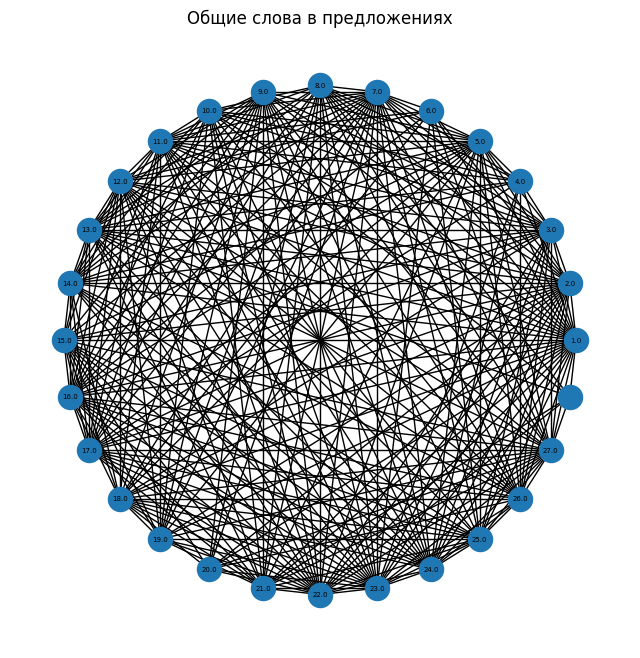

0

In [ ]:
matrix_of_edges = np.zeros((len(graph_in_matrix), len(graph_in_matrix))) # для последнего текста
for i in range(len(graph_in_matrix)):
  for j in range(len(graph_in_matrix)):
    if graph_in_matrix[i][j] != 0:
      matrix_of_edges[i][j] = 1
labels = np.arange(1, len(graph_in_matrix))
print_graph(matrix_of_edges, labels)

In [ ]:
ratin = []
for graph in dann:
  scores = [rate.mean() for rate in graph]
  rating = {i+1: scores[i] for i in range(len(scores))}
  ratin.append(rating)

In [ ]:
sorted_rate = []
for rat in ratin:
  sorted_rating = {}
  sorted_keys = sorted(rat, key=rat.get)[::-1]
  for key in sorted_keys:
    sorted_rating[key] = rat[key]
  sorted_rate.append(sorted_rating)

In [ ]:
# Выведем summary для текстов, равное по количеству предложений в истинном summary
sums = data_test['summary'][:10]
sum_texts = []
for text in sums:
  text = re.sub(r'\([^)]*\)', '', text.as_py())
  text = text.replace("ИИ", "искусственный интеллект")
  sum_texts.append(text.split(".")[:-1])
volume_of_summary = []
for i in range(len(sum_texts)):
  volume_of_summary.append(len(sum_texts[i]))

summaries = []
for i in range(len(new_texts)):
  best_keys = list(sorted_rate[i])[:volume_of_summary[i]] # Номера лучших предложений
  indexes_of_best_sentences = sorted(best_keys)
  summary = ''
  for index in indexes_of_best_sentences:
    summary += new_texts[i][index-1]
    summary += '.'
  summaries.append(summary)

# Second extractive algorithm

In [ ]:
import re
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from scipy import spatial

In [ ]:
texts = data_test['text'][:9]

In [ ]:
new_texts = []
all_w = []
for text in texts:
  all_words = re.sub(r'\([^)]*\)', '', text.as_py())
  all_words = all_words.split(".")
  all_words = all_words[:-1]
  words = []
  for sentence in all_words:
    sentence = re.sub(r'[,"\'-?:!;—%]', '', sentence)
    words.extend(sentence.split())
  all_w.append(words)
  changes = re.sub(r'\([^)]*\)', '', text.as_py())
  splitted_sentences = changes.split('.')
  splitted_sentences = splitted_sentences[:-1]
  sentences = []
  for sentence in splitted_sentences:
    sentence = re.sub(r'[,"\'-?:!;—%]', '', sentence)
    sentences.append(sentence.split())
  new_texts.append(sentences)

In [ ]:
unique = []
for t in all_w:
  unique_w_t = []
  for word in t:
    if word not in unique:
      unique_w_t.append(word)
  unique_w_t.sort()
  unique.append(unique_w_t)

In [ ]:
all_sentences = []
for text in new_texts:
  for sentence in text:
    all_sentences.append(sentence)

In [ ]:
model = Word2Vec(all_sentences, min_count=1, sg=1, workers=8)

In [ ]:
model.train(all_sentences, total_examples=model.corpus_count, epochs=10)

(51030, 56550)

In [ ]:
vocabulary = model.wv.index_to_key
print(len(vocabulary), vocabulary)

3051 ['в', 'и', 'на', 'что', 'не', 'с', 'по', 'его', 'для', 'В', 'к', 'о', 'августа', 'США', 'По', 'от', 'из', 'как', 'года', 'но', 'России', 'было', 'это', 'этом', 'Фрунзе', 'заявил', 'были', 'над', 'словам', 'того', 'Су', 'был', 'а', 'также', 'за', 'мы', 'время', 'уже', 'против', 'тыс', 'стороны', 'во', 'была', 'же', 'он', 'сентября', 'ОАЭ', 'между', 'президента', 'воды', 'при', 'человек', 'Он', 'все', 'стал', 'Израиля', 'действия', 'со', 'Это', 'Крыма', 'заявлении', 'Белоруссии', 'власти', 'до', 'день', 'этот', 'будет', 'РФ', 'НАТО', 'ее', 'которые', 'При', 'есть', 'Израилем', 'их', 'еще', 'Крапивин', 'которая', 'На', 'безопасности', 'ранее', '«Новости»', 'РИА', 'отметил', 'операции', 'у', 'стало', 'после', 'самолет', 'человека', 'который', 'Кроме', 'Европе', 'только', 'Однако', 'банкротств', 'руководство', 'отношения', 'внимание', 'об', 'данным', 'Владимир', 'страны', 'сил', 'более', 'территории', 'пока', 'Крым', 'российские', 'помощи', 'когда', 'быть', 'поддержки', 'Алимхан', 'гра

In [ ]:
word_vectors = []
for text in unique:
  w_t = []
  for word in text:
    w_t.append(model.wv[word])  
  w_t = np.array(w_t)
  word_vectors.append(w_t)
#print(word_vectors, len(word_vectors))

In [ ]:
embeddings_for_text = []
for text in word_vectors:
  words_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(text)
  words_embedded_top = words_embedded[:1000]
  embeddings_for_text.append(words_embedded_top)
print(words_embedded_top.shape)

(520, 2)


In [ ]:
X = words_embedded_top[:, 0]   # Наглядно для полседнего текста
y = words_embedded_top[:, 1]

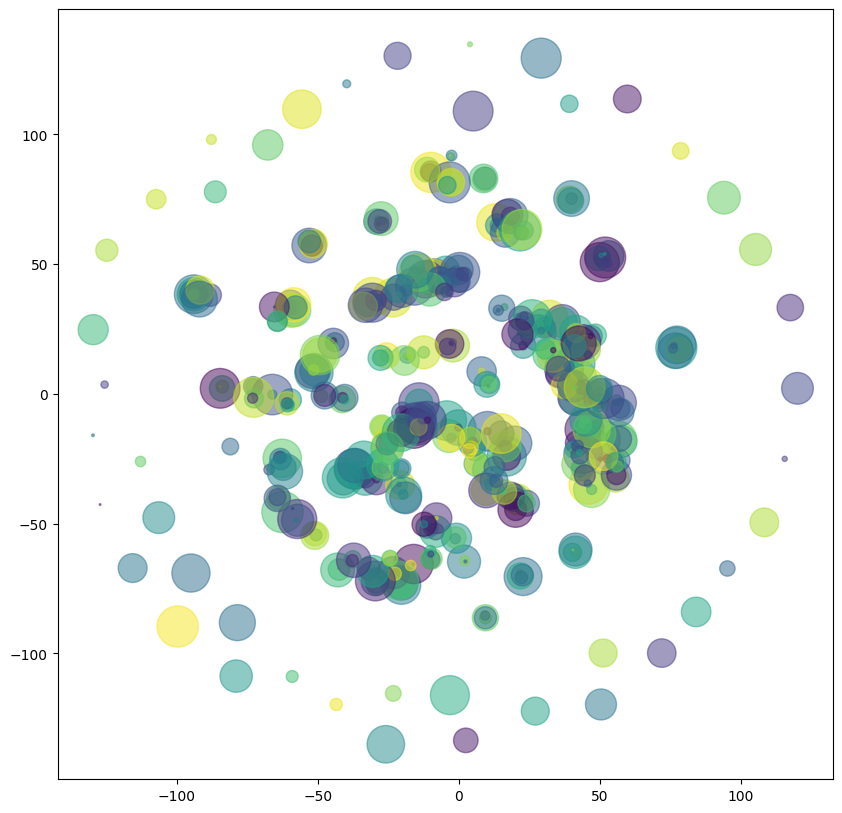

In [ ]:
colors = np.random.rand(len(words_embedded_top))
n = len(words_embedded_top)
area = (30 * np.random.rand(n))**2
plt.figure(num=1, figsize=(10, 10))
plt.scatter(X, y, s=area, c=colors, alpha=0.5)
plt.show()

In [ ]:
vectorized_texts = []
for i in range(len(new_texts)):
  vectorized_sentences = []
  for sentence in new_texts[i]:
    vectorized_sentence = []
    for word in sentence:
      if word not in vocabulary:
        vectorized_sentence.append(np.zeros(len(word_vectors[i][0])))
      else:
        vectorized_sentence.append(model.wv[word])
    vectorized_sentences.append(vectorized_sentence)
  vectorized_texts.append(vectorized_sentences)

In [ ]:
text_vectors = []
for i in range(len(vectorized_texts)):
  sentences_vectors = []
  for sentence in vectorized_texts[i]:
    sum_vectorized_words = np.zeros(len(word_vectors[i][0]))
    for word in sentence:
      sum_vectorized_words += word
    sentences_vectors.append(sum_vectorized_words / len(sentence))
  text_vectors.append(sentences_vectors)
#print(len(text_vectors), text_vectors)

In [ ]:
matrixes_t = []
for text in text_vectors:
  similarity_matrix = np.zeros((len(text), len(text)))
  matrixes_t.append(similarity_matrix)

In [ ]:
matrs = []
for t in range(len(matrixes_t)):
  for i in range(len(matrixes_t[t])):
    for j in range(len(matrixes_t[t])):
      if i < j:
        matrixes_t[t][i][j] = 1 - spatial.distance.cosine(text_vectors[t][i], text_vectors[t][j])
        matrixes_t[t][j][i] = matrixes_t[t][i][j]
  matrs.append(matrixes_t[t])

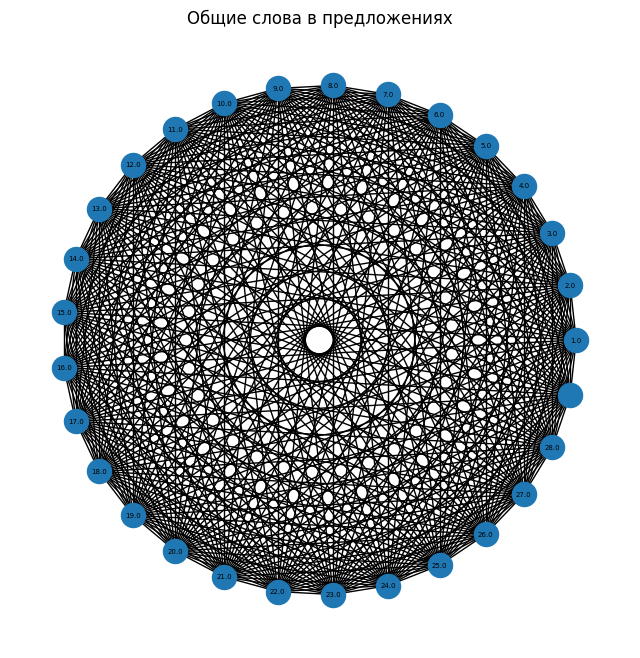

0

In [ ]:
edges_m = []                # Также для последнего текста
for matrix in matrs:
  matrix_of_edges = np.zeros((len(matrix), len(matrix)))
  for i in range(len(matrix)):
    for j in range(len(matrix)):
      if matrix[i][j] != 0:
        matrix_of_edges[i][j] = 1
  edges_m.append(matrix_of_edges)
  labels = np.arange(1, len(similarity_matrix))
print_graph(matrix_of_edges, labels)

In [ ]:
scr = []
for mat in matrs:
  scores = [rate.mean() for rate in mat]
  rating = {i+1: scores[i] for i in range(len(scores))}
  scr.append(rating)

In [ ]:
sor_rat_all = []
for rat in scr:
  sorted_rating = {}
  sorted_keys = sorted(rat, key=rat.get)[::-1]
  for key in sorted_keys:
    sorted_rating[key] = rat[key]
  sor_rat_all.append(sorted_rating)

In [ ]:
# Выведем summary для текстов, равное по количеству предложений в истинном summary
sums = data_test['summary'][:10]
sum_texts = []
for text in sums:
  text = re.sub(r'\([^)]*\)', '', text.as_py())
  sum_texts.append(text.split(".")[:-1])
volume_of_summary = []
for i in range(len(sum_texts)):
  volume_of_summary.append(len(sum_texts[i]))

new_texts = []
for text in texts:
  text = re.sub(r'\([^)]*\)', '', text.as_py())
  new_texts.append(text.split("."))

summaries_v = []
for i in range(len(new_texts)):
  best_keys = list(sor_rat_all[i])[:volume_of_summary[i]] # Номера лучших предложений
  indexes_of_best_sentences = sorted(best_keys)
  summary = ''
  for index in indexes_of_best_sentences:
    summary += new_texts[i][index-1]
    summary += '.'
  summaries_v.append(summary)


# First pretrained abstractive algorithm

In [ ]:
from transformers import AutoTokenizer, T5ForConditionalGeneration

model_name = "IlyaGusev/rut5_base_sum_gazeta"
tokenizer = AutoTokenizer.from_pretrained(model_name)
T5model = T5ForConditionalGeneration.from_pretrained(model_name)

In [ ]:
T5model.modules

<bound method Module.modules of T5ForConditionalGeneration(
  (shared): Embedding(30000, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(30000, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=768, out_features=2048, bias=False)
              (wi_1): Linear(in_features=768, out_features=2048,

In [ ]:
predictions_rut5 = []

data_test.text[i].as_py()

for i in range(10):

  article_text = data_test.text[i].as_py()

  input_ids = tokenizer(
    [article_text],
    max_length=600,
    add_special_tokens=True,
    padding="max_length",
    truncation=True,
    return_tensors="pt"
  )["input_ids"]

  output_ids = T5model.generate(
    input_ids=input_ids,
    no_repeat_ngram_size=4
  )[0]

  summary = tokenizer.decode(output_ids, skip_special_tokens=True)
  predictions_rut5.append(summary)
#  print(summary)

/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1288: UserWarning: Using `max_length`'s default (200) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


# Second pretrained abstractive algorithm

In [ ]:
from transformers import MBartTokenizer, MBartForConditionalGeneration

model_name = "IlyaGusev/mbart_ru_sum_gazeta"
tokenizer = MBartTokenizer.from_pretrained(model_name)
MBartmodel = MBartForConditionalGeneration.from_pretrained(model_name)

predictions_mbart = []

for i in range(10):

  article_text = data_test.text[i].as_py()

  input_ids = tokenizer(
    [article_text],
    max_length=600,
    padding="max_length",
    truncation=True,
    return_tensors="pt",
  )["input_ids"]

  output_ids = MBartmodel.generate(
    input_ids=input_ids,
    no_repeat_ngram_size=4
  )[0]

  summary = tokenizer.decode(output_ids, skip_special_tokens=True)
  predictions_mbart.append(summary)

#scores_mbart = []
#for i in range(len(predictions_mbart)):
#  scores_mbart.append(scorer.score(predictions_mbart[i], data_test.summary[i].as_py()))
#scores_mbart

#print(scores_mbart)

#bleu_mbart = []
#for i in range(len(predictions_mbart)):
#  reference = data_test.summary[i].as_py().split()
#  candidate = predictions_mbart[i]
#  bleu_mbart.append(sentence_bleu(reference, candidate))

#print(bleu_mbart)

In [ ]:
MBartmodel.modules

<bound method Module.modules of MBartForConditionalGeneration(
  (model): MBartModel(
    (shared): Embedding(250027, 1024, padding_idx=1)
    (encoder): MBartEncoder(
      (embed_tokens): Embedding(250027, 1024, padding_idx=1)
      (embed_positions): MBartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x MBartEncoderLayer(
          (self_attn): MBartAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=Tr

# Personal abstractive algorithm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict
import string
import tensorflow as tf
import re
import os
import time
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
ENCODER_LEN = 100
DECODER_LEN = 20
BATCH_SIZE = 64
BUFFER_SIZE = BATCH_SIZE*8

In [ ]:
article = data_train['text']
summary = data_train['summary']
article = article.apply(lambda x: '<SOS> ' + x.as_py() + ' <EOS>')
summary = summary.apply(lambda x: '<SOS> ' + x.as_py() + ' <EOS>')

In [ ]:
def preprocess(text):
    text = re.sub(r"&.[1-9]+;"," ",text)
    return text
article = article.apply(lambda x: preprocess(x))
summary = summary.apply(lambda x: preprocess(x))

In [ ]:
filters = '!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n'
oov_token = '<unk>'
article_tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token=oov_token)
summary_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters=filters, oov_token=oov_token)
article_tokenizer.fit_on_texts(article)
summary_tokenizer.fit_on_texts(summary)
inputs = article_tokenizer.texts_to_sequences(article)
targets = summary_tokenizer.texts_to_sequences(summary)

In [ ]:
ENCODER_VOCAB = len(article_tokenizer.word_index) + 1
DECODER_VOCAB = len(summary_tokenizer.word_index) + 1
print(ENCODER_VOCAB, DECODER_VOCAB)

738478 171906


In [ ]:
inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs, maxlen=ENCODER_LEN, padding='post', truncating='post')
targets = tf.keras.preprocessing.sequence.pad_sequences(targets, maxlen=DECODER_LEN, padding='post', truncating='post')
inputs = tf.cast(inputs, dtype=tf.int64)
targets = tf.cast(targets, dtype=tf.int64)

In [ ]:
dataset1 = tf.data.Dataset.from_tensor_slices((inputs, targets)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
def get_angles(position, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    return position * angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(
        np.arange(position)[:, np.newaxis],
        np.arange(d_model)[np.newaxis, :],
        d_model
    )

    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)

def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)

    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    if mask is not None:
        scaled_attention_logits += (mask * -1e9)  

    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)

    output = tf.matmul(attention_weights, v)
    return output, attention_weights


In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)

        self.dense = tf.keras.layers.Dense(d_model)
        
    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)

        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)

        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))
        output = self.dense(concat_attention)
            
        return output, attention_weights
    
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),
        tf.keras.layers.Dense(d_model)
    ])

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
    
    def call(self, x, training, mask):
        attn_output, _ = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)

        return out2

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)

        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)
    
    
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)

        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)

        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)

        return out3, attn_weights_block1, attn_weights_block2

In [ ]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, maximum_position_encoding, rate=0.1):
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, self.d_model)

        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]

        self.dropout = tf.keras.layers.Dropout(rate)
        
    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1]

        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)
    
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)
    
        return x
    
class Decoder(tf.keras.layers.Layer):
        
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size, maximum_position_encoding, rate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)
    
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        seq_len = tf.shape(x)[1]
        attention_weights = {}

        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training, look_ahead_mask, padding_mask)

            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
    
        return x, attention_weights

In [ ]:
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, target_vocab_size, pe_input, pe_target, rate=0.1):
        super(Transformer, self).__init__()

        self.encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size, pe_input, rate)

        self.decoder = Decoder(num_layers, d_model, num_heads, dff, target_vocab_size, pe_target, rate)

        self.final_layer = tf.keras.layers.Dense(target_vocab_size)
    
    def call(self, inp, tar, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):
        enc_output = self.encoder(inp, training, enc_padding_mask)

        dec_output, attention_weights = self.decoder(tar, enc_output, training, look_ahead_mask, dec_padding_mask)

        final_output = self.final_layer(dec_output)

        return final_output, attention_weights

In [ ]:
num_layers = 3
d_model = 128
dff = 512
num_heads = 4
dropout_rate = 0.2
EPOCHS = 100

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        step = tf.cast(step, tf.float32)
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

Text(0.5, 0, 'Train Step')

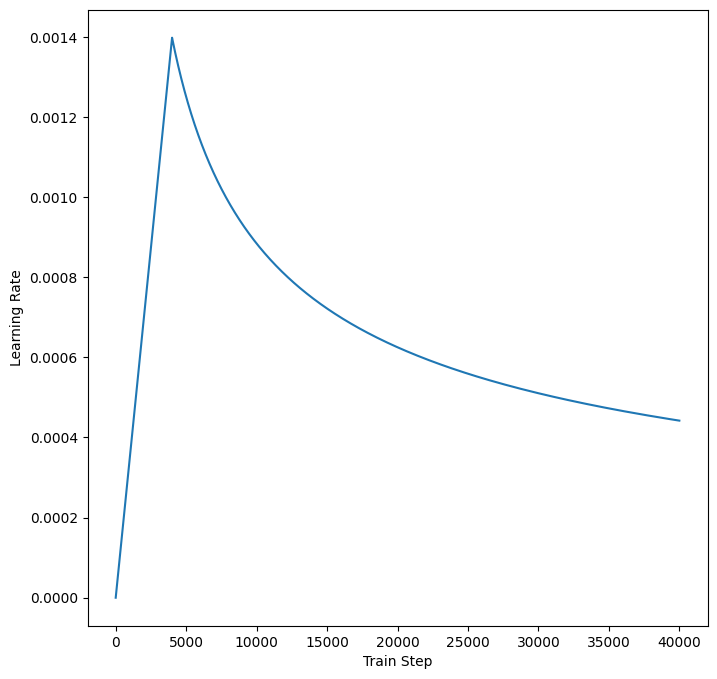

In [ ]:
temp_learning_rate_schedule = CustomSchedule(d_model)

plt.plot(temp_learning_rate_schedule(tf.range(40000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)


def accuracy_function(real, pred):
    accuracies = tf.equal(real, tf.argmax(pred, axis=2))
    #accuracies = tf.cast(accuracies, dtype= tf.float32)

    mask = tf.math.logical_not(tf.math.equal(real, 0))
    accuracies = tf.math.logical_and(mask, accuracies)

    accuracies = tf.cast(accuracies, dtype=tf.float32)
    mask = tf.cast(mask, dtype=tf.float32)
    return tf.reduce_sum(accuracies)/tf.reduce_sum(mask)

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.Mean(name='train_accuracy')

In [ ]:
transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=ENCODER_VOCAB,
    target_vocab_size=DECODER_VOCAB,
    pe_input=1000,
    pe_target=1000,
    rate=dropout_rate)

In [ ]:
def create_masks(inp, tar):
    enc_padding_mask = create_padding_mask(inp)
    dec_padding_mask = create_padding_mask(inp)

    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
  
    return enc_padding_mask, combined_mask, dec_padding_mask

In [ ]:
checkpoint_path = "/content/drive/MyDrive/NLP/model_params"

ckpt = tf.train.Checkpoint(transformer=transformer, optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')

Latest checkpoint restored!!


In [ ]:
@tf.function
def train_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)

    with tf.GradientTape() as tape:
        predictions, _ = transformer(
            inp, tar_inp, 
            True, 
            enc_padding_mask, 
            combined_mask, 
            dec_padding_mask
        )
        loss = loss_function(tar_real, predictions)

    gradients = tape.gradient(loss, transformer.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

    train_loss(loss)
    train_accuracy(accuracy_function(tar_real, predictions))

In [ ]:
for epoch in range(EPOCHS):
    start = time.time()

    train_loss.reset_states()
  
    for (batch, (inp, tar)) in enumerate(dataset1):
        train_step(inp, tar)
    
        if batch % 100 == 0:
            print(f'Epoch {epoch + 1} Batch {batch} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')
      
    if (epoch + 1) % 3 == 0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))
   
    print(f'Epoch {epoch + 1} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')
    print ('Time taken for 1 epoch: {} secs\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 2.7830 Accuracy 0.6466


KeyboardInterrupt: ignored

In [ ]:
def evaluate(input_article):
    input_article = article_tokenizer.texts_to_sequences([input_article])
    input_article = tf.keras.preprocessing.sequence.pad_sequences(input_article, maxlen=ENCODER_LEN, 
                                                                   padding='post', truncating='post')

    encoder_input = tf.expand_dims(input_article[0], 0)

    decoder_input = [summary_tokenizer.word_index['<sos>']]
    output = tf.expand_dims(decoder_input, 0)
    
    for i in range(DECODER_LEN):
        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(encoder_input, output)

        predictions, attention_weights = transformer(
            encoder_input, 
            output,
            False,
            enc_padding_mask,
            combined_mask,
            dec_padding_mask
        )

        predictions = predictions[: ,-1:, :]
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        if predicted_id == summary_tokenizer.word_index['<eos>']:
            return tf.squeeze(output, axis=0), attention_weights

        output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis=0), attention_weights

In [ ]:
def summarize(input_article):
    summarized = evaluate(input_article=input_article)[0].numpy()
    summarized = np.expand_dims(summarized[1:], 0)  
    return summary_tokenizer.sequences_to_texts(summarized)[0]

In [ ]:
articles = data_test['text']
summarys = data_test['summary']
articles = articles.apply(lambda x: '<SOS> ' + x.as_py() + ' <EOS>')
summarys = summarys.apply(lambda x: '<SOS> ' + x.as_py() + ' <EOS>')

In [ ]:
summarize(article[5])

'в омске 17 сотрудников гибдд намерены возбудили уголовное дело о массовых беспорядках на улицах — такое обращение чиновник поручил разобраться'

In [ ]:
article[5]

'<SOS> О многочисленных нарушениях, совершенных местными гаишниками, стало известно в результате плановой проверки прокуратуры. Так, при сверке ведомственных актов выяснилось, что из 7 тысяч человек, лишенных судом водительских прав, у четырехсот водительские удостоверения по-прежнему на руках. «Сотрудники ГАИ, несмотря на решение судов о лишении людей водительских прав, меры к изъятию этих прав не принимали», — заявили «Газете.Ru» в пресс-службе прокуратуры Курганской области. Возбуждено уголовное дело в отношении начальника отдела ГИБДД , возвращавшего «лишенцам» водительские удостоверения. Также возбуждено уголовное дело в отношении инспектора, который для повышения показателей составлял фиктивные протоколы на невиновных граждан. «Люди даже не знали об этом, — рассказали в прокуратуре. — Например, составляли протокол за переход улицы в неположенном месте на человека, который в это время находился в другом районе». При постановке на учет автомобилей в официальную базу АИПС «Автотранс

In [ ]:
summarys[5][5:-5]

' 1 сентября 1920 года красноармейские части Туркестанского фронта взяли приступом Бухару. Боеспособность ее защитников упала после налета советских бомбардировщиков. Уже на следующий день, 2 сентября, командующий фронтом Михаил Фрунзе доложил Владимиру Ленину о ликвидации независимого Бухарского эмирата. Эмир Сеид Алим-хан бежал в Афганистан. А на захваченной территории большевики провозгласили народную советскую республику. '

In [ ]:
articles[5]

'<SOS> Бухарский эмират, правопреемник Бухарского ханства, существовал на территории современных Узбекистана, Таджикистана и части Туркмении с середины XVIII века. В 1868 году это государство попало в зависимость к Российской империи, получив статус ее протектората. Тем не менее, эмиры правили как абсолютные монархи. К началу XX века Санкт-Петербург практически не вмешивался в дела вассального государства. После Февральской революции 1917 года Бухарский эмират вновь обрел независимость, которую подтвердили и большевики после захвата власти в России. Декларируя отсутствие претензий на территорию эмирата, на деле они стремились установить здесь вместо монархии советский режим. Однако первый поход при опоре на младобухарцев в марте 1918 года окончился неудачей. Свергнуть эмира Сеида Алим-хана тогда не удалось. Впрочем, красные не отказались от своей идеи, а только отсрочили начало ее реализации. Эмир Бухарский Сеид Алимхан, 1911 год Бухарская компартия была учреждена на съезде в Ташкенте 

In [ ]:
summarize(articles[5])

'в таджикистане пропавшую к границам под предлогом проведения и смены названия другого — «новые стекла в домах и 1 ноября'

In [ ]:
predictions_pers = []
for i in range(10):
  summ = summarize(articles[i])
  predictions_pers.append(summ)

# Metrics

In [ ]:
!pip install evaluate
import evaluate

meteor = evaluate.load('meteor')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 5.0 MB/s eta 0:00:00


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from rouge_score import rouge_scorer

rouge = evaluate.load('rouge')
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True, split_summaries=True)

vec_w = summaries.copy()

In [ ]:
vv = summaries_v.copy()

In [ ]:
at5 = predictions_rut5.copy()

In [ ]:
ambart = predictions_mbart.copy()

In [ ]:
pers = predictions_pers.copy()

In [ ]:
vw_s = []
rvw = []
for i in range(len(vec_w)):
  vw_s.append(scorer.score(data_test.summary[i].as_py(), vec_w[i]))
  rvw.append(rouge.compute(predictions=[vec_w[i]], references=[data_test.summary[i].as_py()]))

In [ ]:
vv_s = []
rvv = []
for i in range(len(vv)):
  vv_s.append(scorer.score(data_test.summary[i].as_py(), vv[i]))
  rvv.append(rouge.compute(predictions=[vv[i]], references=[data_test.summary[i].as_py()]))

In [ ]:
av_s = []
rat5 = []
for i in range(len(at5)):
  av_s.append(scorer.score(data_test.summary[i].as_py(), at5[i]))
  rat5.append(rouge.compute(predictions=[at5[i]], references=[data_test.summary[i].as_py()]))

In [ ]:
av_m = []
ramb = []
for i in range(len(at5)):
  av_m.append(scorer.score(data_test.summary[i].as_py(), ambart[i]))
  ramb.append(rouge.compute(predictions=[ambart[i]], references=[data_test.summary[i].as_py()]))

In [ ]:
prs = []
rprs = []
for i in range(len(pers)):
  prs.append(scorer.score(data_test.summary[i].as_py(), pers[i]))
  rprs.append(rouge.compute(predictions=[pers[i]], references=[data_test.summary[i].as_py()]))

In [ ]:
def mean_rouge(di_sum, oth):
  sred = []
  sr1 = 0
  sr2 = 0
  sl = 0
  s1 = 0
  s2 = 0
  s3 = 0
  s4 = 0
  for i in range(len(di_sum)):
    sr1 += di_sum[i]['rouge1'].fmeasure
    sr2 += di_sum[i]['rouge2'].fmeasure
    sl += di_sum[i]['rougeL'].fmeasure
    s1 += oth[i]['rouge1']
    s2 += oth[i]['rouge2']
    s3 += oth[i]['rougeL']
    s4 += oth[i]['rougeLsum']
  sr1 = sr1 / len(di_sum)
  sr2 = sr2 / len(di_sum)
  sl = sl / len(di_sum)
  s1 = s1 / len(oth)
  s2 = s2 / len(oth)
  s3 = s3 / len(oth)
  s4 = s4 / len(oth)
  return sr1, sr2, sl, s1, s2, s3, s4

In [ ]:
vw1, vw2, vwl, w1, w2, w3, w4 = mean_rouge(vw_s, rvw)
vv1, vv2, vvl, v1, v2, v3, v4 = mean_rouge(vv_s, rvv)
av1, av2, avl, a1, a2, a3, a4 = mean_rouge(av_s, rat5)
am1, am2, aml, a1m, a2m, a3m, a4m = mean_rouge(av_m, ramb)
ps1, ps2, psl, p1s, p2s, p3s, p4s = mean_rouge(prs, rprs)

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate import meteor_score
from nltk.translate.bleu_score import SmoothingFunction
chencherry = SmoothingFunction()

def bleu_sc(arr_candidates):
  bs = []
  ms = []
  ac = arr_candidates.copy()
  for i in range(len(ac)): 
#    ac[i] = ac[i]
    bs.append(sentence_bleu(data_test.summary[i].as_py(), ac[i], weights=(1, 0, 0, 0), smoothing_function=chencherry.method7))
    ms.append(meteor.compute(predictions=[ac[i]], references=[data_test.summary[i].as_py()]))
#    print(sentence_bleu(data_test.summary[i].as_py().split(), ac[i].split(), weights=(0.5, 0.5, 0, 0), smoothing_function=chencherry.method7))
#    print(sentence_bleu(data_test.summary[i].as_py().split(), ac[i].split(), weights=(0.33, 0.33, 0.33, 0), smoothing_function=chencherry.method7))
#    print(sentence_bleu(data_test.summary[i].as_py().split(), ac[i].split(), weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=chencherry.method7))
  sr = 0
  sm = 0
  for i in range(len(bs)):
    sr += bs[i]
    sm += ms[i]['meteor']
  sr = sr / len(arr_candidates)
  sm = sm / len(arr_candidates)
  return sr, sm


In [ ]:
vwb = bleu_sc(vec_w)

In [ ]:
vwb

(0.3908735271981629, 0.24152406861473383)

In [ ]:
vvb = bleu_sc(vv)

In [ ]:
vvb

(0.3787212046181741, 0.24813409848251602)

In [ ]:
avb = bleu_sc(at5)

In [ ]:
avb

(0.4093548800697825, 0.267177834059392)

In [ ]:
avm = bleu_sc(ambart)

In [ ]:
avm

(0.4030604558486187, 0.31166909034163137)

In [ ]:
psb = bleu_sc(pers)

In [ ]:
psb

(0.4578727304086481, 0.046660004735072376)

In [ ]:
df = pd.DataFrame({'Alg1': [vw1, vw2, vwl, vwb[0], vwb[1]], 'Alg2': [vv1, vv2, vvl, vvb[0], vvb[1]], 'rut5': [av1, av2, avl, avb[0], avb[1]], 'mbart': [am1, am2, aml, avm[0], avm[1]], 'pers_alg': [ps1, ps2, psl, psb[0], psb[1]]}, index=['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'BLEU', 'METEOR'])

In [ ]:
df

,Alg1,Alg2,rut5,mbart,pers_alg
ROUGE-1,0.207407,0.168430,0.130000,0.196667,0.050000
ROUGE-2,0.055556,0.113228,0.066667,0.066667,0.000000
ROUGE-L,0.207407,0.168430,0.130000,0.196667,0.050000
BLEU,0.390874,0.378721,0.409355,0.403060,0.457873
METEOR,0.241524,0.248134,0.267178,0.311669,0.046660


In [ ]:
predictions_pers

['из за повышения цен на бензин о массовых протестов в берлине завершился процесс отказа от сбора средств на территорию фрг',
 'власти израиля предприняли новую атаку от россии в сирию речь идет о потере 360 млрд чтобы уничтожить экономику израиле и',
 'белоруссия усилила контроль на выборах президента с партией «слуга народа» к своими сторонниками и главе республики виктора медведчука по мнению',
 'в совбезе сша заявили о том что американские дипломаты ворвались в здание альянса с просьбой совершить наступление который американские корабли',
 'правительство россии утвердило законопроект о повышении ндфл после того как правительство решит проблемы с бедностью ее шаг сейчас систему труда',
 'в таджикистане пропавшую к границам под предлогом проведения и смены названия другого — «новые стекла в домах и 1 ноября',
 'в госдуме предложили проверить полуостров на территории крыма которые они разместили десятки домов в жилом доме заявила депутат госдумы наталья',
 'в екатеринбурге скончался в

In [ ]:
data_test.summary[1].as_py()

'Делегации Израиля и США прилетели в ОАЭ, где обсудили с руководством страны ряд вопросов в преддверии подписания соглашений о сотрудничестве в гражданских и экономических сферах. Рейс, на котором они прибыли, стал первым прямым перелетом из Тель-Авива. Контакты сторон проходят в рамках подписания соглашения о нормализации отношений, посредником в подписании которого стали США, которые всячески подчеркивают свое участие для получения политических очков Дональдом Трампом.'

In [ ]:
summaries[1]

' Соглашение несет в себе надежду на создание новых мостов, которые будут способствовать деэскалации существующих конфликтов и предотвращению конфликтов в будущем», — говорится в тексте совместного заявления представителей трех стран. Поэтому, если мы посмотрим в будущем, то, в общем, отношения между арабами и Израилем, в основном, будут улучшаться». По прибытии в Абу-Даби зять президента и его советник Джаред Кушнер первым делом сообщил, что прилетел с приветствием от Дональда Трампа.'

In [ ]:
summaries_v[1]

' Палестину же это событие только встревожило — руководство страны опасается, что соглашение между ОАЭ и Израилем создаст угрозу уже устоявшейся арабской солидарности против планов Тель-Авива по аннексии спорных территорий. Значимым стал тот факт, что самолет пролетел над воздушным пространством Саудовской Аравии, что стало еще одним важным для Израиля знаком, сигнализирующим, по крайней мере, о согласии королевства на полет. Достижения, к слову, нужны и Биньямину Нетаньяху , который попал в ловушку, когда решительно поддержал «сделку» и объявил об аннексии территорий на Западном берегу Иордана как об уже решенном деле.'

In [ ]:
predictions_rut5[1]

'Высокопоставленная американская и израильская делегация находятся в ОАЭ с двухдневным визитом, за время которого стороны заключили историческое соглашение о нормализации отношений. В ходе визита стороны обсудят вопросы торговли и туризма, а также вопросы безопасности.'

In [ ]:
predictions_mbart[1]

'Высокопоставленная американская и израильская делегация находятся в ОАЭ с двухдневным визитом, за время которого стороны заключили историческое соглашение о нормализации отношений. В ходе визита в Абу-Даби стороны намерены обсудить вопросы двустороннего сотрудничества в сфере торговли и туризма, а также вопросы безопасности.'

In [ ]:
predictions_pers[1]

'власти израиля предприняли новую атаку от россии в сирию речь идет о потере 360 млрд чтобы уничтожить экономику израиле и'